In [1]:
__author__ = 'Alice Jacques <alice.jacques@noirlab.edu>, Astro Data Lab Team <datalab@noirlab.edu>' 
__version__ = '20230124' #yyyymmdd 
__datasets__ = ['ls_dr9','sdss_dr17','des_dr1','smash_dr2','unwise_dr1','allwise','nsc_dr2'] 
__keywords__ = ['crossmatch','image cutout']

# How to use the pre-crossmatched tables at Astro Data Lab

by Alice Jacques and the Astro Data Lab Team

### Table of contents
* [Goals & notebook summary](#goals)
* [Disclaimer & attribution](#attribution)
* [Imports & setup](#import)
* [Authentication](#auth)
* [Accessing the pre-crossmatched tables](#access)
* [Speed test](#speedtest)
* [Appendix](#appendix)
* [Resources & references](#refs)

<a class="anchor" id="goals"></a>
# Goals

* Understand the structure of the pre-crossmatched tables at Data Lab
* Learn how to access the pre-crossmatched tables at Data Lab
* Compare the retrieval speeds between an on-the-fly crossmatch table and a pre-crossmatched table

For examples using the pre-crossmatched tables hosted at Astro Data Lab, see our [Examples using the pre-crossmatched tables notebook](https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/CrossmatchTables/Examples_using_pre_crossmatched_tables.ipynb).

# Summary

#### Crossmatch table naming template
The crossmatch tables at Astro Data Lab are named as follows:

`schema1.xNpN__table1__schema2__table2`

where the N in NpN encode the numerical value of the crossmatching radius (since dots '.' are not allowed in table names).

Example: 

`ls_dr9.x1p5__tractor__nsc_dr2__object`

is a crossmatch table (indicated by the leading x after the dot '.'), located in the ls_dr9 schema, and it crossmatches the **ls_dr9.tractor** table with the **nsc_dr2.object** table (which lives in the nsc_dr2 schema) within a 1.5 arcseconds radius ('1p5') .

This is admittedly long, but clean, consistent, and most importantly, parsable. The use of double-underscores '\__' is to distinguish from single underscores often used in schema and table names.


#### Columns in crossmatch tables
All pre-crossmatched tables have only these seven columns: id1, ra1, dec1, id2, ra2, dec2, distance. Column descriptions in the pre-crossmatched table contain the original column names in parentheses (this makes them parsable).

For example:

`ls_dr9.x1p5__tractor__nsc_dr2__object`

| Column   | Description                                     | Datatype |
|----------|-------------------------------------------------|----------|
| id1      | ID in left/first table (ls_id)                  | BIGINT   |
| ra1      | Right ascension in left/first table (ra)        | DOUBLE   |
| dec1     | Declination in left/first table (dec)           | DOUBLE   |
| id2      | ID in right/second table (id)                   | VARCHAR  |
| ra2      | Right ascension in right/second table (ra)      | DOUBLE   |
| dec2     | Declination in right/second table (dec)         | DOUBLE   |
| distance | Distance between ra1,dec1 and ra2,dec2 (arcsec) | DOUBLE   |


#### Datatypes in crossmatch tables

* The column data types in a pre-crossmatched table for columns id1 and id2 are retained from the mother tables. The example above, BIGINT, is valid in many cases, but need not be for all data sets.
* The data types for columns ra1, dec1, ra2, dec2 are DOUBLE.
* The column distance can be either REAL or DOUBLE.

#### Overview

* **The following 5 data sets are considered the main reference tables** and are crossmatched against all data sets (if there is sky overlap) and when a new data set is ingested:  
    - latest gaia_drN.gaia_source    
    - latest nsc_drN.object
    - latest unwise_drN.object
    - allwise.source  
    - latest sdss_drN.specobj
* **"Crossmatch" means for now "single nearest neighbor"** (and this is the current mode at Data Lab).
* **Object tables only**, not single epoch measurements or metadata tables.
* For every crossmatch table with table1 as the left/first table and table2 as the right/second table, there exists a corresponding crossmatch table with table2 as the left/first table and table1 as the right/second table. 
    - For example, `allwise.x1p5__source__des_dr2__main` and `des_dr2.x1p5__main__allwise__source`.

The list of available crossmatch tables can be viewed in our [table schema browser](https://datalab.noirlab.edu/query.php) under their respective schema.

<a class="anchor" id="attribution"></a>
# Disclaimer & attribution
If you use this notebook for your published science, please acknowledge the following:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, http://dx.doi.org/10.1117/12.2057445

* Data Lab disclaimer: https://datalab.noirlab.edu/disclaimers.php

<a class="anchor" id="import"></a>
# Imports and setup

In [2]:
# std lib
from getpass import getpass

# 3rd party
from astropy.utils.data import download_file  #import file from URL
from matplotlib.ticker import NullFormatter
import pylab as plt
import matplotlib
%matplotlib inline

# Data Lab
from dl import authClient as ac, queryClient as qc, storeClient as sc
from dl.helpers.utils import convert # converts table to Pandas dataframe object

<a class="anchor" id="auth"></a>
# Authentication
Much of the functionality of Data Lab can be accessed without explicitly logging in (the service then uses an anonymous login). But some capacities, for instance saving the results of your queries to your virtual storage space, require a login (i.e. you will need a registered user account).

If you need to log in to Data Lab, issue this command, and respond according to the instructions:

In [3]:
#ac.login(input("Enter user name: (+ENTER) "),getpass("Enter password: (+ENTER) "))
ac.whoAmI()

'demo00'

<a class="anchor" id="access"></a>
# Accessing the pre-crossmatched tables 
We can use Data Lab's Query Client to access the pre-crossmatched tables hosted by Data Lab. First let's get a total count of the number of objects (nrows) in SDSS DR17 that are also in LS DR9:

In [4]:
%%time
query="SELECT nrows FROM tbl_stat WHERE schema='sdss_dr17' and tbl_name='x1p5__specobj__ls_dr9__tractor'"

# Call query manager
response = qc.query(sql=query)
print(response)

nrows
4559787

CPU times: user 29.9 ms, sys: 7.03 ms, total: 37 ms
Wall time: 96.8 ms


Now let's print just the first 100 rows:

In [5]:
%%time
query = "SELECT * FROM sdss_dr17.x1p5__specobj__ls_dr9__tractor LIMIT 100"
result = qc.query(sql=query,fmt='pandas')
result

CPU times: user 36.3 ms, sys: 2.24 ms, total: 38.6 ms
Wall time: 96 ms


id1        ra1       dec1               id2         ra2  \
0   3384465917919389696  287.22826  48.064735  9907737095837650  287.228165   
1   3384466192797296640  287.44889  48.229698  9907737159009377  287.448870   
2   3384462344506599424  287.38750  48.168965  9907737158950166  287.387517   
3   3384463718896134144  287.69779  48.382804  9907737221862367  287.697861   
4   3384465093285668864  287.54718  48.407654  9907737221859120  287.547174   
..                  ...        ...        ...               ...         ...   
95  3384469766210086912  287.60106  48.844872  9907737284317775  287.601034   
96  3384471690355435520  287.70990  48.888661  9907737346511898  287.709937   
97  3384469491332179968  287.66389  48.944252  9907737346510986  287.663800   
98  3384480486448457728  287.22115  48.827232  9907737284252188  287.221105   
99  3384477737669388288  287.29420  48.927487  9907737346445470  287.294186   

         dec2  distance  
0   48.064735  0.227509  
1   48.229697  0.049226  
2   48.168933  0.121452  
3   48.382752  0.252610  
4   48.407548  0.381269  
..        ...       ...  
95  48.844932  0.223774  
96  48.888637  0.123855  
97  48.944491  0.887495  
98  48.827183  0.206944  
99  48.927487  0.032387  

[100 rows x 7 columns]

<a class="anchor" id="speedtest"></a>
# Speed test

### First example
Here we compare the speed of using the `q3c_join()` function to crossmatch directly in a query (`query1`) versus using a pre-crossmatched table and a JOIN statement (`query2`). We retrieve the same specified columns and the same random rows for the two queries. We will see that `query2` retrieves results faster than `query1` can retrieve results.

#### First, running the crossmatch ourselves:

In [6]:
%%time
query1 = """
SELECT
    a.source_id AS id1, a.ra AS ra1, a.dec AS dec1,
    gg.specobjid AS id2, gg.ra AS ra2, gg.dec AS dec2,
    (q3c_dist(a.ra, a.dec, gg.ra, gg.dec)*3600) AS distance 
FROM 
    allwise.source AS a
INNER JOIN LATERAL (
    SELECT 
        s.specobjid, s.ra, s.dec
    FROM 
        sdss_dr17.specobj AS s
    WHERE
        q3c_join(a.ra, a.dec, s.ra, s.dec, 1.5/3600.0)
    ORDER BY
        random()
    ASC LIMIT 1
) AS gg ON true
WHERE 
    a.random_id BETWEEN 10 and 10.01
"""
df1 = qc.query(sql=query1,fmt='pandas',timeout=600)
df1 = df1.sort_values('id1')

CPU times: user 35.7 ms, sys: 6.41 ms, total: 42.1 ms
Wall time: 1min 39s


#### Now, the same but using pre-crossmatched tables:

In [7]:
%%time
query2 = """
SELECT 
    X.id1, X.id2, X.ra1, X.dec1, X.ra2, X.dec2, X.distance
FROM 
    allwise.x1p5__source__sdss_dr17__specobj AS X 
JOIN 
    allwise.source AS a ON X.id1 = a.source_id 
WHERE 
    a.random_id BETWEEN 10 and 10.01
"""
df2 = qc.query(sql=query2,fmt='pandas')
df2 = df2.sort_values('id1')

CPU times: user 33.5 ms, sys: 3.02 ms, total: 36.5 ms
Wall time: 805 ms


#### Distance histograms for first example
Here we plot the two distance histograms to demonstrate that the results obtained by both the JOIN and the q3c crossmatch queries are identical.

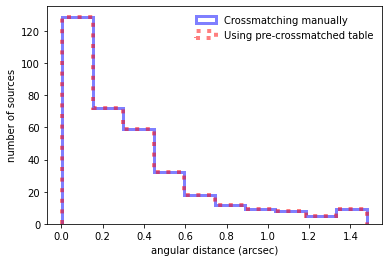

In [8]:
plt.hist(df1['distance'],histtype='step',color='b',lw=3,ls='-',alpha=0.5,label='Crossmatching manually')
plt.hist(df2['distance'],histtype='step',color='r',lw=4,ls=':',alpha=0.5,label='Using pre-crossmatched table')
plt.xlabel('angular distance (arcsec)')
plt.ylabel('number of sources')
plt.legend(loc='upper right',frameon=False)
plt.show()

### Second example: we use a different catalog, and switch the order of queries
We again select objects from two catalogs and retrieve the same specified columns and the same random rows for two queries. `query3` uses a pre-crossmatched table and a JOIN query while `query4` crossmatches directly in the query using the `q3c_join()` function. We will see that `query3` retrieves results faster than `query4` can retrieve results.

#### First, using pre-crossmatched tables:

In [9]:
%%time
query3 = """
SELECT 
    X.id1, X.id2, X.ra1, X.dec1, X.ra2, X.dec2, X.distance
FROM 
    unwise_dr1.x1p5__object__sdss_dr17__specobj AS X 
JOIN
    unwise_dr1.object AS u ON X.id1 = u.unwise_objid
WHERE
    u.random_id BETWEEN 10 and 10.01
"""
df3 = qc.query(sql=query3,fmt='pandas',timeout=600)
df3 = df3.sort_values('id1')

CPU times: user 30.2 ms, sys: 4 ms, total: 34.2 ms
Wall time: 11.3 s


#### Now, running the crossmatch ourselves: 

In [10]:
%%time
query4 = """
SELECT
    u.unwise_objid AS id1, u.ra AS ra1 ,u.dec AS dec1,
    ss.specobjid AS id2, ss.ra AS ra2, ss.dec AS dec2,
    (q3c_dist(u.ra, u.dec, ss.ra, ss.dec)*3600.0) AS distance 
FROM 
    unwise_dr1.object AS u
INNER JOIN LATERAL (
    SELECT 
        s.specobjid, s.ra, s.dec
    FROM 
        sdss_dr17.specobj AS s
    WHERE
        q3c_join(u.ra, u.dec, s.ra, s.dec, 1.5/3600.0)
    ORDER BY
        random()
    ASC LIMIT 1
) as ss ON true
WHERE 
    u.random_id BETWEEN 10 and 10.01
"""
df4 = qc.query(sql=query4,fmt='pandas',timeout=600)
df4 = df4.sort_values('id1')

CPU times: user 38.8 ms, sys: 7.54 ms, total: 46.3 ms
Wall time: 2min 12s


#### Distance histograms for second example
Here we plot the two distance histograms to demonstrate that the results obtained by both the JOIN and the q3c crossmatch queries are identical.

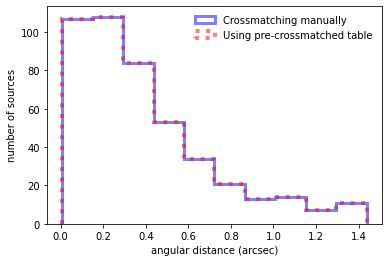

In [11]:
plt.hist(df4['distance'],histtype='step',color='b',lw=3,ls='-',alpha=0.5,label='Crossmatching manually')
plt.hist(df3['distance'],histtype='step',color='r',lw=4,ls=':',alpha=0.5,label='Using pre-crossmatched table')
plt.xlabel('angular distance (arcsec)')
plt.ylabel('number of sources')
plt.legend(loc='upper right',frameon=False)
plt.show()

<a class="anchor" id="appendix"></a>
# Appendix

A clear benefit of pre-crossmatched tables is that they contain the positions of the same objects in two datasets. We can use this to e.g. fetch images of an object from both surveys.

## A1. unWISE DR1 vs LS DR9 
Here we will compare two images of the same object from two different catalogs, unWISE DR1 and LS DR9. 

### Function to retrieve cutouts

In [12]:
def make_cutout_comparison_table(ra_in1, dec_in1, layer1, layer2, pixscale, ra_in2=None, dec_in2=None):
    """
    Obtain color JPEG images from Legacy Survey team cutout tool at NERSC
    """    
    img1 = []
    img2 = []
    
    for i in range(len(ra_in1)):
        cutout_url1 = "https://www.legacysurvey.org/viewer/cutout.jpg?ra=%g&dec=%g&layer=%s&pixscale=%s" % (ra_in1[i],dec_in1[i],layer1,pixscale)
        img = plt.imread(download_file(cutout_url1,cache=True,show_progress=False,timeout=120))
        img1.append(img)
        
        cutout_url2 = "https://www.legacysurvey.org/viewer/cutout.jpg?ra=%g&dec=%g&layer=%s&pixscale=%s" % (ra_in2[i],dec_in2[i],layer2,pixscale)
        img = plt.imread(download_file(cutout_url2,cache=True,show_progress=False,timeout=120))
        img2.append(img)

    return img1,img2

### Function to generate plots

In [13]:
def plot_cutouts(img1,img2,cat1,cat2):
    """
    Plot images in two rows with 5 images in each row
    """
    fig = plt.figure(figsize=(21,7))

    for i in range(len(img1)):
        ax = fig.add_subplot(2,6,i+1)
        ax.imshow(img1[i])
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.tick_params(axis='both',which='both',length=0)
        ax.text(0.02,0.93,'ra=%.5f'%list_ra1[i],transform=ax.transAxes,fontsize=12,color='white')
        ax.text(0.02,0.85,'dec=%.5f'%list_dec1[i],transform=ax.transAxes,fontsize=12,color='white')
        ax.text(0.02,0.77,cat1,transform=ax.transAxes,fontsize=12,color='white')

        ax = fig.add_subplot(2,6,i+7)
        ax.imshow(img2[i])
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.tick_params(axis='both',which='both',length=0)
        ax.text(0.02,0.93,'ra=%.5f'%list_ra2[i],transform=ax.transAxes,fontsize=12,color='white')
        ax.text(0.02,0.85,'dec=%.5f'%list_dec2[i],transform=ax.transAxes,fontsize=12,color='white')
        ax.text(0.02,0.77,cat2,transform=ax.transAxes,fontsize=12,color='white')

    plt.subplots_adjust(wspace=0.02, hspace=0.03)

###  Write query to randomly select five targets (RA/Dec positions) from unWISE DR1 and LS DR9 crossmatch table
... then save them as arrays and set the captions, layers, and pixscale. Finally we plot the cutout images.

CPU times: user 282 ms, sys: 34.3 ms, total: 316 ms
Wall time: 2min 51s


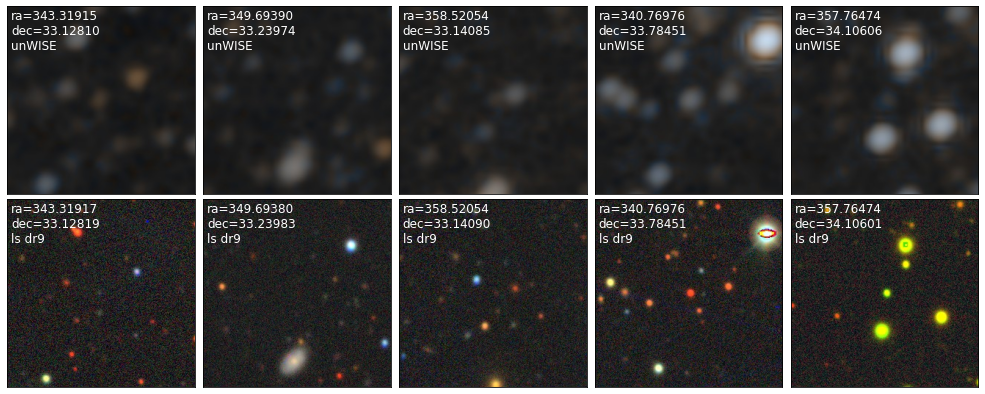

In [14]:
%%time
q = """
SELECT
    ra1, dec1, ra2, dec2 
FROM
    unwise_dr1.x1p5__object__ls_dr9__tractor 
WHERE
    ra1>300 and dec1>33 
ORDER BY
    random() 
LIMIT 5
"""

r = qc.query(sql=q,fmt='pandas')

list_ra1=r['ra1'].values       # ".values" convert to numpy array
list_dec1=r['dec1'].values
list_ra2=r['ra2'].values       
list_dec2=r['dec2'].values

cat1='unWISE'
cat2='ls dr9'
layer1='unwise-neo6'
layer2='ls-dr9'
pixscale='0.3'
img1,img2 = make_cutout_comparison_table(list_ra1,list_dec1,layer1,layer2,
                                         pixscale,list_ra2,list_dec2)
plot_cutouts(img1,img2,cat1,cat2)

## A2. SDSS vs DES DR1
Here we will compare two images of the same object from two different catalogs, SDSS and DES DR1.

### Write query to randomly select five targets (RA/Dec positions) from SDSS DR17 and DES DR1 crossmatch table
... then save them as arrays and set the captions, layers, and pixscale. Finally we plot the cutout images.

CPU times: user 281 ms, sys: 15.6 ms, total: 297 ms
Wall time: 9.3 s


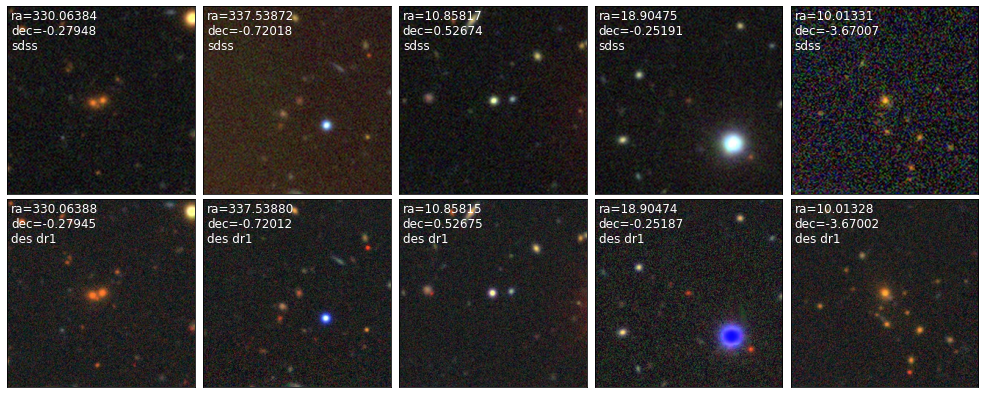

In [20]:
%%time
q = """
SELECT
    ra1, dec1, ra2, dec2 
FROM
    sdss_dr17.x1p5__specobj__des_dr1__main 
ORDER BY
    random() 
LIMIT 5
"""

r = qc.query(sql=q,fmt='pandas')

list_ra1=r['ra1'].values       # ".values" convert to numpy array
list_dec1=r['dec1'].values
list_ra2=r['ra2'].values       
list_dec2=r['dec2'].values

cat1='sdss'
cat2='des dr1'
layer1='sdss'
layer2='des-dr1'
pixscale='0.25'
img1,img2 = make_cutout_comparison_table(list_ra1,list_dec1,layer1,layer2,
                                         pixscale,list_ra2,list_dec2)
plot_cutouts(img1,img2,cat1,cat2)

## A3. Cool galaxy finds: SDSS vs DES DR1

We compare two images of the same galaxy from two different catalogs, SDSS and DES DR1. We use a list of identified galaxies (RA/Dec positions) to compare the difference in observable features and quality between the two catalogs.

First we import the CSV file of identified galaxies (RA/Dec positions) into MyDB:

In [16]:
qc.mydb_import('gals','./gals.csv',drop=True)

'OK'

We write the query to select the first five RA/Dec positions from our table. We then save them as arrays and set the captions, layers, and pixscale. Finally we plot the cutout images.

CPU times: user 251 ms, sys: 17.2 ms, total: 268 ms
Wall time: 717 ms


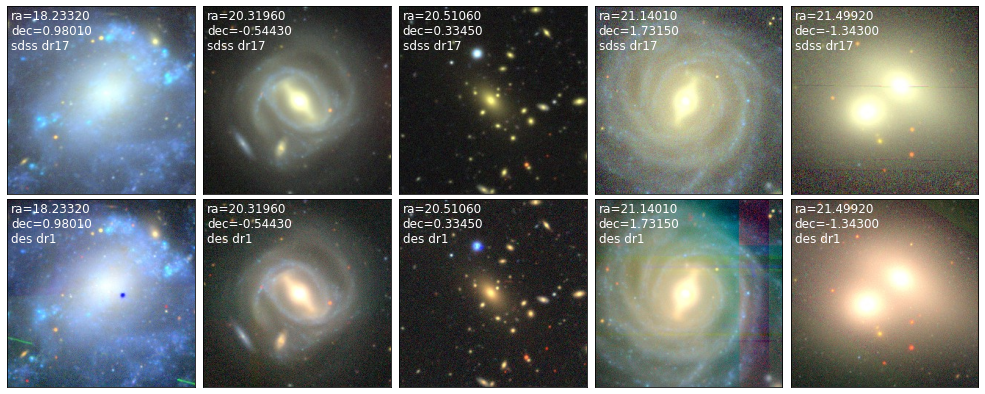

In [17]:
%%time
qg = "SELECT ra, dec FROM mydb://gals LIMIT 5"
rg = qc.query(sql=qg)
rp = convert(rg)
list_ra1=rp['ra'].values 
list_dec1=rp['dec'].values
list_ra2=rp['ra'].values
list_dec2=rp['dec'].values

cat1='sdss dr17'
cat2='des dr1'
layer1='sdss'
layer2='des-dr1'
pixscale='0.5'

img1,img2 = make_cutout_comparison_table(list_ra1,list_dec1,layer1,layer2,
                                        pixscale,ra_in2=list_ra1,dec_in2=list_dec1)
plot_cutouts(img1,img2,cat1,cat2)

We write the next query to select the next five RA/Dec positions from our table. We then save them as arrays and set the captions, layers, and pixscale. Finally we plot the cutout images.

CPU times: user 236 ms, sys: 23.2 ms, total: 259 ms
Wall time: 484 ms


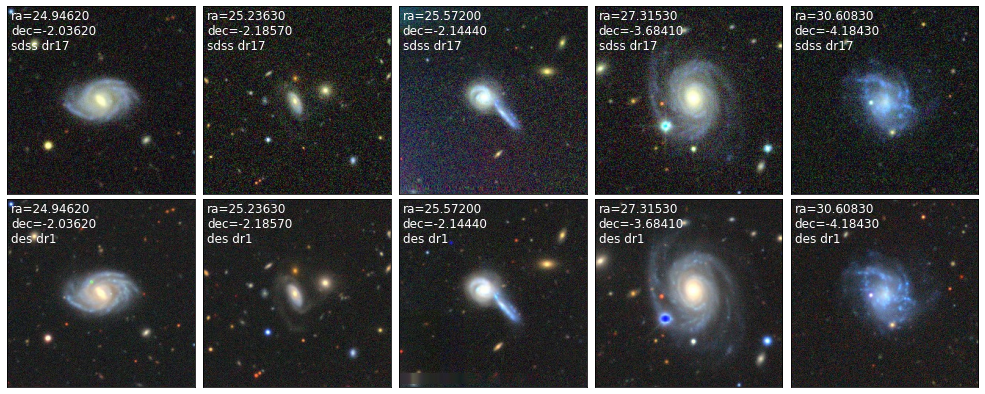

In [18]:
%%time
qg = "SELECT ra, dec FROM mydb://gals LIMIT 5 OFFSET 5"
rg = qc.query(sql=qg)
rp = convert(rg)
list_ra1=rp['ra'].values      
list_dec1=rp['dec'].values
list_ra2=rp['ra'].values     
list_dec2=rp['dec'].values

img1,img2 = make_cutout_comparison_table(list_ra1,list_dec1,layer1,layer2,
                                        pixscale,ra_in2=list_ra1,dec_in2=list_dec1)
plot_cutouts(img1,img2,cat1,cat2)

We write the next query to select the last five RA/Dec positions from our table. We then save them as arrays and set the captions, layers, and pixscale. Finally we plot the cutout images.

CPU times: user 245 ms, sys: 3.23 ms, total: 248 ms
Wall time: 405 ms


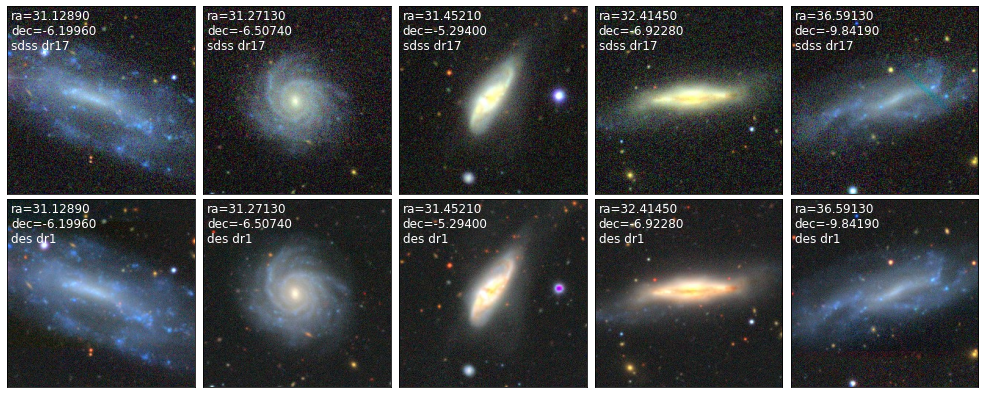

In [19]:
%%time
qg = "SELECT ra, dec FROM mydb://gals LIMIT 5 OFFSET 10"
rg = qc.query(sql=qg)
rp = convert(rg)
list_ra1=rp['ra'].values    
list_dec1=rp['dec'].values
list_ra2=rp['ra'].values     
list_dec2=rp['dec'].values

img1,img2 = make_cutout_comparison_table(list_ra1,list_dec1,layer1,layer2,
                                        pixscale,ra_in2=list_ra1,dec_in2=list_dec1)
plot_cutouts(img1,img2,cat1,cat2)

<a class="anchor" id="refs"></a>
# Resources & references

Legacy Survey Sky Browser: https://www.legacysurvey.org/viewer#NGC%203098